In [6]:
# import pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

print(torch.__version__)


2.2.1+cu121


In [2]:
# Optional to run code on GPU
# Check if CUDA is available and if device is GPU
print('Cuda Available : {}'.format(torch.cuda.is_available()))
print('GPU - {0}'.format(torch.cuda.get_device_name()))

# Note:
# If this gives you an error on Google colab, go into 'Additional connection otions' > 'Change runtime type' > Select a GPU as the Hardware Accelerator
# If you're running code on your machine locally, your machine needs have a GPU supported graphics card and CUDA installed.

Cuda Available : True
GPU - Tesla T4


### Here's a great beginner tutorial for reference on how to train a classifier with PyTorch on image data: [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

# Q3

In [3]:
# Load MNIST dataset
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_test = datasets.MNIST('data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 153999515.67it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 23091058.68it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46550029.93it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5619625.01it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



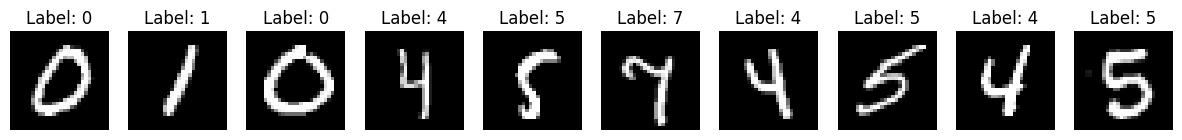

In [8]:
# visualise the dataset

import matplotlib.pyplot as plt

# Define a function to visualize images and their labels
def visualize_samples(dataset, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Visualize samples from the training set
visualize_samples(mnist_train)

In [5]:
# Check MNIST statistics
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(mnist_train.data.min(), mnist_train.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(mnist_train.data.float().mean(), mnist_train.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(mnist_train.data.float().mean() / 255, mnist_train.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624


In [11]:
# normalize and prepare data for training the model

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the pixel values
])

# TODO: Load MNIST training dataset with transformations
mnist_train = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

# TODO: Split dataset into training, validation, and test sets
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
minst_train, mnist_val = random_split(mnist_train, [train_size, val_size])

# TODO: Define data loaders
train_loader = DataLoader(mnist_train, batch_size = 500, shuffle = True)
val_loader = DataLoader(mnist_val, batch_size = 500)
test_loader = DataLoader(mnist_train, batch_size = 500)

In [12]:
# TODO: Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        #TODO: define the layers of the model here
        self.flatten = nn.Flatten() #Input layer

        #Hidden Layer(s)
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)    #any values for 512 and 256

        #Output Layer
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        #TODO: pass the data through each layer of the model here
        x= self.flatten(x)
        x = torch.relu(self.fc1(x)) #hidden layer 1 relu activation function
        x = torch.relu(self.fc2(x)) #hidden layer 1 relu activation layer
        x= self.output(x)
        return x

In [13]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

# Initialize model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = MLP().to(device)

# TODO: Define the following for your model
# loss function
loss_fnt = nn.CrossEntropyLoss()


# learning rate
# optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-4)  #trial end error optimisers, random learning rate(lr)
# number of epochs to train the model
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
  model.training()
    # TODO: train the model
      # get the inputs from train data loader
      for batch_idx, (data, trargets) in enumerate(tqdm(train(loader, desc = f"Epoch {eposh+1}")))):
        optimizer.zero_grad()
        outputs = model(data.to(device))
        loss = loss_fnt(outputs, target.to(device))
        loss.backwrds()
        optimizer.setup
      # zero the parameter gradients
      # forward pass through the model
      # backward propagation + optimize
      # print statistics

    # TODO: Validate the model
      # get inputs from validation data loader
      # forward pass + get predicted outputs
      # calculate accuracy of predictions
      # print statistics
      model.eval()
      correct = 0
      total = 0
      with torch.no_grad():
        for data,targets in val_loader:




Epoch 1: 100%|██████████| 750/750 [00:16<00:00, 44.21it/s]


Epoch [1/10], Validation Accuracy: 29.55%


Epoch 2: 100%|██████████| 750/750 [00:13<00:00, 57.58it/s]


Epoch [2/10], Validation Accuracy: 41.14%


Epoch 3: 100%|██████████| 750/750 [00:12<00:00, 58.83it/s]


Epoch [3/10], Validation Accuracy: 48.21%


Epoch 4: 100%|██████████| 750/750 [00:14<00:00, 53.53it/s]


Epoch [4/10], Validation Accuracy: 54.23%


Epoch 5: 100%|██████████| 750/750 [00:13<00:00, 54.87it/s]


Epoch [5/10], Validation Accuracy: 59.77%


Epoch 6: 100%|██████████| 750/750 [00:13<00:00, 56.79it/s]


Epoch [6/10], Validation Accuracy: 65.05%


Epoch 7: 100%|██████████| 750/750 [00:12<00:00, 58.83it/s]


Epoch [7/10], Validation Accuracy: 68.82%


Epoch 8: 100%|██████████| 750/750 [00:16<00:00, 46.44it/s]


Epoch [8/10], Validation Accuracy: 71.97%


Epoch 9: 100%|██████████| 750/750 [00:13<00:00, 54.29it/s]


Epoch [9/10], Validation Accuracy: 74.41%


Epoch 10: 100%|██████████| 750/750 [00:13<00:00, 53.88it/s]


Epoch [10/10], Validation Accuracy: 76.38%


In [ ]:
# TODO: Show loss and accuracy plots

In [ ]:
# TODO: Evaluate the model on the test data
  # get inputs from test data loader
      # forward pass + get predicted outputs
      # calculate accuracy of predictions
      # print statistics

Test Accuracy: 77.82%


# Q4

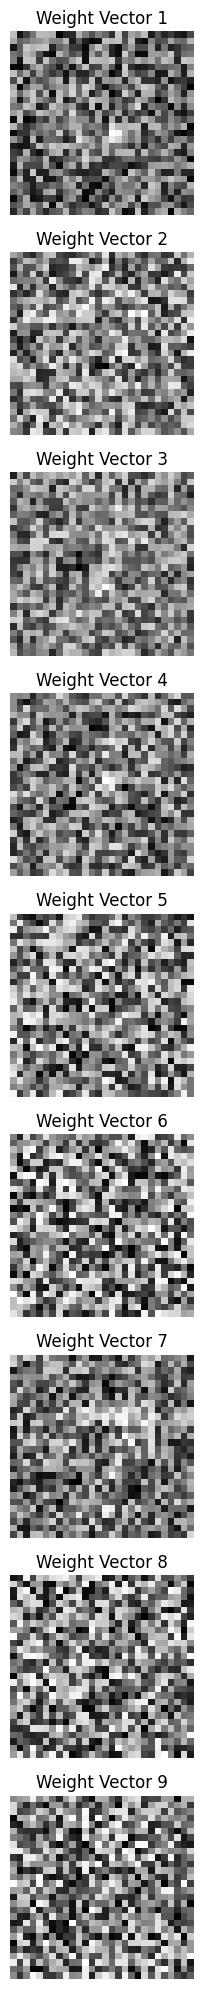

In [ ]:
# TODO: Extract the weight matrix of the first hidden layer


# TODO: Normalize each row of the weight matrix to [0, 1]
normalized_weight_matrix =

# Visualize the first 9 rows of the normalized weight matrix
num_rows_to_visualize = 9
fig, axes = plt.subplots(num_rows_to_visualize, 1, figsize=(10, 20))
for i in range(num_rows_to_visualize):
    axes[i].imshow(normalized_weight_matrix[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Weight Vector {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()